# <font color=red> CMT307 Applied Machine Learning </font>
<a class="anchor" id="main_title"></a>
## Coursework 2 - 2021-2022 Spring semester
### Group 12
<br/>

[Matthew Esposito](mailto:EspositoMD1@cardiff.ac.uk)<br />
[Chuntong Huang](mailto:HuangC31@cardiff.ac.uk)<br />
[Matthew Jepson](mailto:JepsonMW@cardiff.ac.uk)<br />
[Guoyi Jia](mailto:JiaG@cardiff.ac.uk)<br /> 
[Zhicong Tang](mailto:TangZ19@cardiff.ac.uk)<br /> 
[Hekang Zhang](mailto:ZhangH120@cardiff.ac.uk)<br /> 
[Xiaoling Zhu](mailto:ZhuX41@cardiff.ac.uk)<br />
[Jose Mendoza](mailto:mendoza-jimenezjc@cardiff.ac.uk)<br />


<a class="anchor" id="index"></a>
# Contents
***
## [0. Import required modules](#0)
<br/>

***
## [1. Descriptive analysis of the dataset + Error analysis](#1)
<br/>

### [1.0. Data load ](#1_0)
### [1.1. Exploratory data analysis ](#1_1)
### [1.2. Data visualization ](#1_2)

<br/>

***
## [2. Preprocessing + Literature review](#2)
<br/>

### [2.1 Data pre-processing](#2_1)
### [2.2 Literature review](#2_2)

<br/>

***
## [3. Implementation + results](#3)
<br/>

### [3.1 Model implementation](#3_1)
#### [3.1.1. CNN arquitechture ](#3_1_1)

<br/>

### [3.2 Model training and parameter tuning](#3_2)

### [3.3 Performance review](#3_3)

<br/>


Initial discussion and project scope

***
# 0. Import required modules
<a class="anchor" id="0"></a>
#### [Return to index](#main_title)
<br/>

Import required packages for each part of the coursework:


In [ ]:
# General modules:
import numpy as np
import os
import random

# Exploratory data analysis:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns


In [ ]:
# Data pre-processing
from sklearn.model_selection import train_test_split
from skimage.transform import resize

In [ ]:
# Machine learning module
import tensorflow as tf
import keras

In [ ]:
# Task modules:
from t0_module import x_train, y_train, x_test, y_test, class_names, train_dir, test_dir 


***
# 1. Descriptive analysis of the dataset + error analysis 
<a class="anchor" id="1"></a>
#### [Return to index](#main_title)
<br/>

The scope of this section is to get a general idea of the whole dataset.
We will start creating a histogram to see how many pictures are available for each category.

## 1.0 Data load 
<a class="anchor" id="1_0"></a>
#### [Return to index](#main_title)

In [ ]:
#train_df = pd.read_csv("data/Train.csv")
train_df = pd.read_csv("train_summary.csv")

test_df = pd.read_csv("data/Test.csv")

train_df.head()

In [ ]:
train_df['Area'] = train_df.Height * train_df.Width

train_df.head()

## Create a dataframe with summary data per **category**: 
### train_df_cat

In [ ]:
train_df_cat = train_df.groupby('ClassId', as_index=False).mean().sort_values(by='Area', ascending=True)

print(train_df_cat.head())

### Create a barplot to explore average picture area:

In [ ]:
fig = plt.figure(figsize=(40, 18))
ax=plt.subplot()

plt.barh(range(len(train_df_cat)), train_df_cat['Area'])

plt.title('Average picture Area per Category', fontsize=40)
plt.xlabel('Average picture area', fontsize = 20)
plt.ylabel('Traffic sign', fontsize = 20)

labels = [ class_names[i] for i in train_df_cat.index ]
ax.set_yticks(range(len(train_df_cat)))
ax.set_yticklabels(labels)

plt.yticks(fontsize=14)
plt.xticks(fontsize=14)

plt.savefig("report/images/area_barplot.png")

plt.show()


### Create a barplot to explore number of pictures per category:

In [ ]:
train_counts = train_df.ClassId.value_counts().sort_values(ascending = True)

train_counts

In [ ]:
fig = plt.figure(figsize=(40, 18))
ax=plt.subplot()

plt.barh(range(len(train_counts)), train_counts.values, color = 'green')
plt.title('Number of pictures per category', fontsize=40)
plt.xlabel('Number of pictures', fontsize = 20)
plt.ylabel('Traffic sign', fontsize = 20)

#labels = [ class_names[i] for i in train_counts.index ]
labels = train_counts.index

ax.set_yticks(range(len(train_counts)))
ax.set_yticklabels(labels)

plt.yticks(fontsize=14)
plt.xticks(fontsize=14)

plt.savefig("report/images/num_pictures_barplot.png")

plt.show()


## Create a dataframe from decoded train pictures: 
### x_train + y_train -> df_pixels

In [ ]:
pic_means = [ picture.mean() for picture in x_train]

df_pixels = pd.DataFrame( list(zip(pic_means, y_train)), columns=['Picture avg', 'Category']  )


In [ ]:
df_pixels.head(5)

## Box plot of picture's individual average intensity per category:

In [ ]:
# box plot showing relationship between education and compenstation
fig = plt.figure(figsize=(25, 10))
ax=plt.subplot()

sns.boxplot(x = "Category", y = "Picture avg", palette = "mako", data = df_pixels)
plt.title('Average pixel intensity per category', fontsize=30)
plt.xlabel('Traffic sign')
plt.ylabel('Average pixel intensity')

#labels = [ class_names[i] for i in train_counts.index ]
#ax.set_xticks(range(len(train_counts)))
#ax.set_xticklabels(labels, rotation = 90)

plt.xticks(rotation = 90)

plt.savefig("report/images/pixel_intensity_barplot.png")

plt.show()

## Distribution of picture's average intensity per category

In [ ]:
# Create the main figure:
fig = plt.figure(figsize=(25,25))

# Create a collection of axes names for the following subplot:
axes = [category + "_ax" for category in class_names]

for i in range(len(class_names)) :
    
    axes[i] = fig.add_subplot(9, 5 , i+1)
        
    fig.set_figheight(40)
    fig.set_figwidth(40)
    
    category = class_names[i]
    values = df_pixels[df_pixels.Category == category]["Picture avg"]
    
    axes[i].hist([values], bins = 10, facecolor = 'green')
    #sns.histplot(values)
    
    axes[i].axis('equal')  
    axes[i].set_title(class_names[i])

    
fig.tight_layout(pad=8.0)
fig.suptitle("Distribution of pixel intensity per category", fontsize=40, y= 1.0)

plt.savefig("report/images/pixel_intensity_distribution.png")

plt.show()     

## Inspect 5 random pictures from the Test directory

In [ ]:
imgs = os.listdir(test_dir)
from matplotlib.image import imread

plt.figure(figsize=(25,25))

for i in range(1,26):
    
    plt.subplot(5,5,i)
    random_img_path = test_dir + random.choice(imgs)
    rand_img = imread(random_img_path)
    
    plt.imshow(rand_img)
    #plt.grid(b=None)
    plt.xlabel(rand_img.shape[1], fontsize = 20)#width of image
    plt.ylabel(rand_img.shape[0], fontsize = 20)#height of image
    
plt.savefig("report/images/random_pictures.png")
    

## 1.1 Exploratory data analysis 
<a class="anchor" id="1_1"></a>
#### [Return to index](#main_title)

In [ ]:
# Explore the number of files using .value_counts()





## 1.2 Data visualization 
<a class="anchor" id="1_2"></a>
#### [Return to index](#main_title)

In [ ]:
# Create a histogram with the number of pictures per category:





In [ ]:
# Create a box-plot with the average pixel intensity per picture:





In [ ]:
# Visualize 25 random pictures from the test dataset:





***
# 2. Preprocessing + Literature review 
<a class="anchor" id="2"></a>
#### [Return to index](#main_title)

## 2.1 Data pre-processing 
<a class="anchor" id="2_1"></a>
#### [Return to index](#main_title)

In [ ]:
# Resize all pictures: 
# Use pillow package (pip install PIL) then -> from PIL import Image . Use .fromarray() and .resize() methods to load and resize images.







In [ ]:
# Resize TEST pictures (NOT TRAIN) for a trial:

img_width = 30
img_height = 30

x_test_resized = np.array([resize(image, (img_width, img_height)) for image in x_test])

In [ ]:
index = 3469

plt.figure()
plt.imshow(x_test_resized[index, ], cmap = 'gray')
plt.title(y_test[index])
plt.show()

In [222]:
# Normalize data 0 -- 1
x_train = x_train/255
x_test = x_text/255

# Target picture features:
img_width = 30
img_height = 30
channels = 3

NameError: name 'x_text' is not defined

In [ ]:
# Resize whole train image dataset:
x_train_resized = np.array([ resize(image, (img_width, img_height)) for image in x_train])

In [ ]:
# Shuffle train pictures:

shuffle_indexes = np.arange(x_train_resized.shape[0])
np.random.shuffle(shuffle_indexes)

x_train_resized = x_train_resized[shuffle_indexes]
y_train = y_train[shuffle_indexes]


In [ ]:
# Split the train data into train and validation set:

X_train, X_val, Y_train, Y_val = train_test_split(x_train_resized, y_train, test_size=0.3, random_state=42, shuffle=True)

#X_train = X_train/255 
#X_val = X_val/255

print("X_train.shape", X_train.shape)
print("X_valid.shape", X_val.shape)
print("y_train.shape", Y_train.shape)
print("y_valid.shape", Y_val.shape)


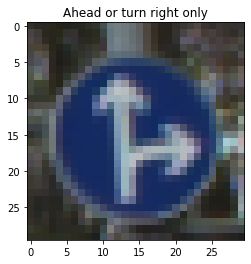

In [204]:
index = 3729

plt.figure()
plt.imshow(X_train[index, ], cmap = 'gray')
plt.title(Y_train[index])
plt.show()

In [230]:
# One hot encoding the labels:

Y_train = keras.utils.to_categorical(Y_train, len(class_names))
Y_val = keras.utils.to_categorical(Y_val, len(class_names))

print(Y_train.shape)
print(Y_val.shape)


ValueError: invalid literal for int() with base 10: 'Pass by on right'

## 2.2 Literature Review 
<a class="anchor" id="2_2"></a>
#### [Return to index](#main_title)

<br/>
<br/>
Data review and justification for the choosing the model below will be detailed in the Markdown report.
<br/>
<br/>

***
# 3. Implementation + results 
<a class="anchor" id="3"></a>
#### [Return to index](#main_title)

## 3.1 Model implementation 
<a class="anchor" id="3_1"></a>
#### [Return to index](#main_title)

In [208]:
# Create a CNN model:

model = keras.models.Sequential([    
    keras.layers.Conv2D(filters=16, kernel_size=(3,3), activation='relu', input_shape=(img_height, img_width, channels)),
    keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    keras.layers.BatchNormalization(axis=-1),
    
    keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    keras.layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    keras.layers.BatchNormalization(axis=-1),
    
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(rate=0.5),
    
    keras.layers.Dense(43, activation='softmax')
])



### 3.1.1 CNN Architecture  
<a class="anchor" id="3_1_1"></a>
#### [Return to index](#main_title)

In [ ]:
# Discuss CNN model and add more layers if neccesary:






## 3.2 Model training and parameter tuning
<a class="anchor" id="3_2"></a>
#### [Return to index](#main_title)

In [217]:
# Train the model:

#history = model.fit(aug.flow(X_train, Y_train, batch_size=32), epochs=epochs, validation_data=(X_val, y_val))

class_codes = dict(zip(class_names, range(len(class_names))))

Y_train_codes = [ class_codes[entry] for entry in Y_train]
Y_test_codes = [ class_codes[entry] for entry in y_test]

model.summary()
model.compile(loss = "sparse_categorical_crossentropy", optimizer="sgd", metrics = ["accuracy"])
history = model.fit(X_train, np.array(Y_train_codes), epochs = 30)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 16)        448       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 26, 26, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 13, 13, 32)        128       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 9, 9, 128)         73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 128)        

NameError: name 'X_test' is not defined

In [226]:
new_model = tf.keras.models.load_model('saved_models/00-24-37-912214')

In [229]:
Y_test_codes

[16,
 1,
 38,
 33,
 11,
 38,
 18,
 12,
 25,
 35,
 12,
 7,
 23,
 7,
 4,
 9,
 21,
 20,
 27,
 38,
 4,
 33,
 9,
 3,
 1,
 11,
 13,
 10,
 9,
 11,
 5,
 17,
 34,
 23,
 2,
 17,
 3,
 12,
 16,
 8,
 7,
 30,
 18,
 12,
 24,
 25,
 3,
 10,
 18,
 8,
 25,
 13,
 15,
 9,
 13,
 35,
 5,
 26,
 9,
 16,
 38,
 10,
 4,
 9,
 15,
 9,
 26,
 2,
 5,
 28,
 11,
 25,
 30,
 34,
 5,
 12,
 1,
 10,
 25,
 25,
 21,
 33,
 25,
 7,
 10,
 35,
 3,
 7,
 22,
 13,
 3,
 1,
 2,
 14,
 12,
 32,
 3,
 38,
 9,
 33,
 1,
 10,
 5,
 11,
 33,
 4,
 35,
 25,
 33,
 4,
 1,
 14,
 16,
 10,
 30,
 3,
 27,
 29,
 1,
 17,
 13,
 7,
 1,
 8,
 2,
 10,
 10,
 30,
 1,
 6,
 36,
 3,
 14,
 13,
 11,
 10,
 18,
 40,
 2,
 38,
 41,
 4,
 6,
 18,
 17,
 25,
 2,
 41,
 11,
 21,
 7,
 24,
 11,
 25,
 17,
 3,
 6,
 9,
 7,
 4,
 13,
 16,
 4,
 25,
 18,
 9,
 13,
 14,
 29,
 17,
 13,
 38,
 26,
 25,
 33,
 1,
 3,
 40,
 13,
 2,
 8,
 4,
 36,
 25,
 20,
 25,
 18,
 1,
 10,
 8,
 10,
 29,
 12,
 38,
 31,
 2,
 8,
 38,
 18,
 28,
 17,
 9,
 4,
 1,
 17,
 9,
 2,
 31,
 13,
 15,
 15,
 38,
 25,
 5,
 25,
 

In [227]:
model.evaluate(x_test, np.array(Y_test_codes))

ValueError: Error when checking input: expected conv2d_1_input to have 4 dimensions, but got array with shape (12630, 1)

In [220]:
# Save model
from datetime import datetime
now = datetime.now().time() # time object

save_path = "saved_models/" + str(now).replace(".","-").replace(":","-")
model.save(save_path)

## 3.3 Performance review
<a class="anchor" id="3_3"></a>
#### [Return to index](#main_title)

In [224]:
# Plot accuracy vs loss performance and discuss the need of data augmentation:

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()


TypeError: Cannot interpret '<attribute 'dtype' of 'numpy.generic' objects>' as a data type